In [4]:
import math
import numpy as np
from scipy.linalg import expm 
import matplotlib.pyplot as plt


In [5]:
def eulerstep(A, uold, h):
    unew = uold + h*A@uold
    return unew


In [6]:
def eulerint(A, y0, t0, tf, N,):
    h = (tf-t0)/N
    tgrid = np.linspace(t0,tf,N)
    dim = A.shape

    Y = np.zeros((N, dim[0])) 
    Y[0,:] = y0

    for i in range(N-1):
         x = eulerstep(A, np.transpose(Y[i, :]), h)
         Y[i+1,:] = np.transpose(x)

    correct = np.zeros_like(Y)
    error = np.zeros_like(Y)
    for i in range(N):
        correct[i,:] = expm(A*tgrid[i])@y0

    error = abs(Y-correct)


    return tgrid, Y, error, correct

In [12]:
def errVSH(A,y0,t0,tf):
    #X = 100
    #Nvec = np.linspace(100, 10000, X)
    #ErrorVec = [0]*X
    plt.xlabel("H")
    plt.ylabel("Error")
    plt.title("Error as a function of time (linlog)")
    plt.grid()
    tgridtemp, Y, error, correct = eulerint(A, y0, t0, tf, 1000)
     #for i in range(X):
     #  tgridtemp, Y, error = eulerint(A, y0, t0, tf, int(Nvec[i]))
      # ErrorVec[i] = Y[-1, 1]
       
    plt.semilogy(tgridtemp,error)
    #plt.plot(tgridtemp, Y)
    #plt.plot(tgridtemp, correct)

   #plt.semilogy(tgridtemp,Y[:,1]/abs(Y[:,0]))
   
 

       

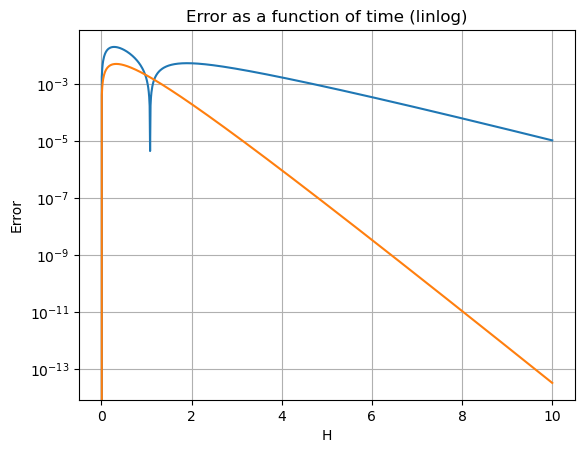

In [13]:
t0 = 0
tf = 10
y0 = np.transpose([1,1])
A = np.array([[-1, 10] , 
              [0, -3]])
errVSH(A,y0,t0,tf)




In [9]:
def ieulerstep(A, uold, h):
    unew = uold + h*A@uold
    return unew

In [10]:
def ieulerint(A, y0, t0, tf, N,):
    h = (tf-t0)/N
    tgrid = np.linspace(t0,tf,N)
    dim = A.shape

    Y = np.zeros((N, dim[0])) 
    Y[0,:] = y0

    for i in range(N-1):
         x = eulerstep(A, np.transpose(Y[i, :]), h)
         Y[i+1,:] = np.transpose(x)

    correct = np.zeros_like(Y)
    error = np.zeros_like(Y)
    for i in range(N):
        correct[i,:] = expm(A*tgrid[i])@y0

    error = abs(Y-correct)


    return tgrid, Y, error, correct

In [11]:
def ierrVSH(A,y0,t0,tf):
    #X = 100
    #Nvec = np.linspace(100, 10000, X)
    #ErrorVec = [0]*X
    plt.xlabel("H")
    plt.ylabel("Error")
    plt.title("Error as a function of time (linlog)")
    plt.grid()
    tgridtemp, Y, error, correct = eulerint(A, y0, t0, tf, 1000)
     #for i in range(X):
     #  tgridtemp, Y, error = eulerint(A, y0, t0, tf, int(Nvec[i]))
      # ErrorVec[i] = Y[-1, 1]
       
    plt.semilogy(tgridtemp,error/abs(Y))
    #plt.plot(tgridtemp, Y)
    #plt.plot(tgridtemp, correct)

   #plt.semilogy(tgridtemp,Y[:,1]/abs(Y[:,0]))
   